# Streaming Service Dataset - Exploratory and Descriptive Analysis(EDA) and Hypothesis testing
In this notebook, we conduct an in-depth exploratory and descriptive analysis of a streaming service dataset, which includes information on user demographics, watch habits, content preferences, download behaviors, subscription levels, and interaction history.

The primary goal of this analysis is to uncover user engagement patterns, understand content consumption trends, and detect factors influencing loyalty and satisfaction. This foundational step is critical before any modeling or recommendation engine development, as it helps us identify data quality issues, understand feature distributions, and observe key relationships.

Throughout the analysis, we examine how metrics like watch hours, loyalty points, download activity, and ratings vary across different age groups, countries, genres, and platform types. Visual tools are used extensively to present insights clearly and interactively.

### import library

**pandas**: Used for data manipulation, cleaning, and analysis in tabular form.

**numpy**: Provides fast numerical computations and array operations.

**os**: Manages file and directory paths for saving and loading data or outputs.

**plotly.express**:Creates interactive and customizable visualizations.

# EDA

In [3]:
# import Libraries
import pandas as pd
import numpy as np
import os
import plotly.express as px
import statsmodels.api as sm
from scipy import stats

## Define and Create Directory Paths

To ensure reproducibility andorganized storage, we programmatically create directories for:

- **raw data**
- **processed data**
- **results**
- **documentation**

These directories will store intermediate and final outputs for reproducibility.



In [5]:
# Get working directory
current_dir=os.getcwd()

# Go one directory up to root directory
project_root_dir=os.path.dirname(current_dir)

# Define paths to the data folders
data_dir=os.path.join(project_root_dir,'data')
raw_dir=os.path.join(data_dir,'raw')
processed_dir=os.path.join(data_dir,'processed')

# Define paths to results folders
result_dir=os.path.join(project_root_dir,'results')

# Define paths to Docs folder
docs_dir=os.path.join(project_root_dir,'docs')

# Create a directories if they do not exists

os.makedirs(raw_dir,exist_ok=True)
os.makedirs(processed_dir,exist_ok=True)
os.makedirs(result_dir,exist_ok=True)
os.makedirs(docs_dir,exist_ok=True)

## Loading a cleaned dataset 

this dataset is stored in **processed folder**

In [7]:
stream_data_filename=os.path.join(processed_dir,"cleaned_stream_data.csv")
stream_df=pd.read_csv(stream_data_filename)
stream_df.head()

,User_ID,User_Name,Join_Date,Last_Login,Monthly_Price,Watch_Hours,Favorite_Genre,Active_Devices,Profile_Count,Parental_Controls,...,Average_Rating_Given,Has_Downloaded_Content,Membership_Status,Loyalty_Points,First_Device_Used,Age_Group,Primary_Watch_Time,Watch_Hour_Group,Loyalty_Point_Group,Age_Category
0,2518,Amber,5/15/2023,12/13/2024,7.99,49,Action,3,6,True,...,3.3,False,Active,2878,Smartphone,35-44,Late Night,0-50,2000-2999,Mature Streamers
1,6430,Patrick,4/3/2023,12/15/2024,7.99,161,Drama,1,2,True,...,4.0,False,Active,2291,Desktop,25-34,Evening,101-200,2000-2999,Adult Streamers
2,1798,Robert,8/2/2023,12/14/2024,11.99,87,Action,2,5,False,...,3.1,False,Active,1692,Desktop,35-44,Late Night,51-100,1000-1999,Mature Streamers
3,5255,Cole,1/31/2023,12/2/2024,15.99,321,Sci-Fi,1,5,False,...,4.6,False,Active,952,Desktop,25-34,Evening,301-500,0-999,Adult Streamers
4,2854,Jamie,6/6/2023,12/15/2024,11.99,386,Documentary,1,4,True,...,3.7,False,Active,1823,Desktop,25-34,Late Night,301-500,1000-1999,Adult Streamers


### Understanding a Dataset

Number of rows and columns we have after making cleaning We have **1000** rows and **26** columns

In [9]:
stream_df.shape

(1000, 26)

## 📄 Dataset Columns and Data Types

| Column Name               | Data Type | Description                                                                                     |
|---------------------------|-----------|-------------------------------------------------------------------------------------------------|
| **User_ID**               | int64     | Unique identifier for each user.                                                               |
| **User_Name**             | object    | The name or username of the user.                                                              |
| **Join_Date**             | object    | The date when the user created their account (stored as string/object).                         |
| **Last_Login**            | object    | The most recent login date for the user (stored as string/object).                             |
| **Monthly_Price**         | float64   | Monthly subscription price paid by the user.                                                  |
| **Watch_Hours**           | int64     | Total hours the user has spent watching content.                                              |
| **Favorite_Genre**        | object    | The genre most frequently watched by the user (e.g., Action, Comedy, Drama).                   |
| **Active_Devices**        | int64     | Number of devices linked to the user account.                                                 |
| **Profile_Count**         | int64     | Number of user profiles under the account.                                                    |
| **Parental_Controls**     | bool      | Indicates if parental control settings are enabled (True or False).                            |
| **Total_Movies_Watched**  | int64     | Total movies watched by the user.                                                             |
| **Total_Series_Watched**  | int64     | Total series watched by the user.                                                             |
| **Country**               | object    | User's country of residence (e.g., USA, UK, India).                                           |
| **Payment_Method**        | object    | Payment method used by the user (e.g., Credit Card, PayPal).                                  |
| **Language_Preference**   | object    | Preferred content/interface language (e.g., English, Spanish).                                |
| **Recommended_Content_Count** | int64  | Number of recommended contents the user received.                                            |
| **Average_Rating_Given**  | float64   | Average rating given by the user to the content.                                              |
| **Has_Downloaded_Content**| bool      | Whether the user has downloaded any content (True or False).                                  |
| **Membership_Status**     | object    | Membership status indicating active or inactive.                                              |
| **Loyalty_Points**       | int64     | Total loyalty points accumulated by the user.                                                |
| **First_Device_Used**    | object    | The first device used to access the platform (e.g., Smartphone, Smart TV).                    |
| **Age_Group**            | object    | Age group category the user belongs to (e.g., Teen, Adult, Senior).                           |
| **Primary_Watch_Time**   | object    | Time of day the user most frequently watches content (e.g., Morning, Evening).                |
| **Watch_Hour_Group**     | object    | Group/category based on total watch hours (e.g., Low, Medium, High).                          |
| **Loyalty_Point_Group**  | object    | Group/category based on loyalty points accumulated.                                          |
| **Age_Category**         | object    | Categorized age data used for grouped analysis (e.g., 18–25, 26–35).                         |

---

**Data Types Summary:**

- **bool:** 2 columns  
- **float64:** 2 columns  
- **int64:** 8 columns  
- **object (string):** 14 columns  


In [11]:
stream_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   User_ID                    1000 non-null   int64  
 1   User_Name                  1000 non-null   object 
 2   Join_Date                  1000 non-null   object 
 3   Last_Login                 1000 non-null   object 
 4   Monthly_Price              1000 non-null   float64
 5   Watch_Hours                1000 non-null   int64  
 6   Favorite_Genre             1000 non-null   object 
 7   Active_Devices             1000 non-null   int64  
 8   Profile_Count              1000 non-null   int64  
 9   Parental_Controls          1000 non-null   bool   
 10  Total_Movies_Watched       1000 non-null   int64  
 11  Total_Series_Watched       1000 non-null   int64  
 12  Country                    1000 non-null   object 
 13  Payment_Method             1000 non-null   object

In [12]:
summary_df=pd.DataFrame({
                'Column':stream_df.columns,
                 'Data Type':stream_df.dtypes.values,
                 'Missing Values': stream_df.isnull().sum().values
})
summary_df

,Column,Data Type,Missing Values
0,User_ID,int64,0
1,User_Name,object,0
2,Join_Date,object,0
3,Last_Login,object,0
4,Monthly_Price,float64,0
5,Watch_Hours,int64,0
6,Favorite_Genre,object,0
7,Active_Devices,int64,0
8,Profile_Count,int64,0
9,Parental_Controls,bool,0


## Summary Statistics
### Numerical Varible

In [14]:
stream_df.describe()

,User_ID,Monthly_Price,Watch_Hours,Active_Devices,Profile_Count,Total_Movies_Watched,Total_Series_Watched,Recommended_Content_Count,Average_Rating_Given,Loyalty_Points
count,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,5610.52100,12.026000,254.516000,3.04600,3.460000,515.897000,99.746000,51.482000,4.01030,2444.217000
std,2566.98922,3.238702,140.667264,1.42966,1.749703,282.697585,58.452238,29.323498,0.58459,1434.619603
min,1003.00000,7.990000,10.000000,1.00000,1.000000,12.000000,1.000000,0.000000,3.00000,3.000000
25%,3587.75000,7.990000,136.000000,2.00000,2.000000,273.750000,48.750000,26.000000,3.50000,1251.500000
50%,5694.00000,11.990000,256.000000,3.00000,3.000000,510.000000,103.000000,52.500000,4.00000,2423.000000
75%,7794.25000,15.990000,373.250000,4.00000,5.000000,770.750000,150.000000,77.000000,4.50000,3660.000000
max,9996.00000,15.990000,500.000000,5.00000,6.000000,1000.000000,200.000000,100.000000,5.00000,4990.000000


### Streaming service descriptions

| **Feature**                   | **Count** | **Mean**   | **Std**    | **Min**  | **25%**   | **50%**   | **75%**   | **Max**   |
|------------------------------|-----------|------------|------------|----------|-----------|-----------|-----------|-----------|
| **User_ID**                  | 1000      | 5610.52    | 2566.99    | 1003     | 3587.75   | 5694.00   | 7794.25   | 9996      |
| **Monthly_Price ($)**        | 1000      | 12.03      | 3.24       | 7.99     | 7.99      | 11.99     | 15.99     | 15.99     |
| **Watch_Hours**              | 1000      | 254.52     | 140.67     | 10.00    | 136.00    | 256.00    | 373.25    | 500.00    |
| **Active_Devices**           | 1000      | 3.05       | 1.43       | 1.00     | 2.00      | 3.00      | 4.00      | 5.00      |
| **Profile_Count**            | 1000      | 3.46       | 1.75       | 1.00     | 2.00      | 3.00      | 5.00      | 6.00      |
| **Total_Movies_Watched**     | 1000      | 515.90     | 282.70     | 12.00    | 273.75    | 510.00    | 770.75    | 1000.00   |
| **Total_Series_Watched**     | 1000      | 99.75      | 58.45      | 1.00     | 48.75     | 103.00    | 150.00    | 200.00    |
| **Recommended_Content_Count**| 1000      | 51.48      | 29.32      | 0.00     | 26.00     | 52.50     | 77.00     | 100.00    |
| **Average_Rating_Given**     | 1000      | 4.01       | 0.58       | 3.00     | 3.50      | 4.00      | 4.50      | 5.00      |
| **Loyalty_Points**           | 1000      | 2444.22    | 1434.62    | 3.00     | 1251.50   | 2423.00   | 3660.00   | 4990.00   |


## Streaming service interpretations

- **Subscription Tiers**:  
  The **average monthly price is $12.03**, indicating a mix of users subscribing to **both basic and premium plans**.

- **Viewing Habits**:  
  Users watched an **average of 254 hours**, with wide variation (**10 to 500 hours**), showing **diverse engagement levels**.

- **Device Usage**:  
  On average, users access content through **~3 active devices**, reflecting **multi-device usage** per account.

- **Content Consumption**:  
  Users are **highly engaged**, with an **average of 516 movies** and **100 series** watched, showing strong **content consumption** behavior.

- **Recommendation Efficiency**:  
  Users interacted with about **51 recommended items** on average, suggesting the **recommendation system is utilized** and effective.

- **User Ratings**:  
  The **average user rating is 4.01/5**, indicating **high satisfaction** with the platform’s content.

- **Loyalty**:  
  Loyalty points range from **3 to 4990**, with an average of **2444**, demonstrating **strong platform retention** and consistent **user loyalty**.



### categorical Variable

In [17]:
stream_df.describe(include='object')

,User_Name,Join_Date,Last_Login,Favorite_Genre,Country,Payment_Method,Language_Preference,Membership_Status,First_Device_Used,Age_Group,Primary_Watch_Time,Watch_Hour_Group,Loyalty_Point_Group,Age_Category
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,340,540,30,7,7,4,6,1,5,5,4,5,5,5
top,Michael,4/17/2023,11/29/2024,Horror,USA,PayPal,Mandarin,Active,Tablet,45-54,Late Night,301-500,1000-1999,Older Streamers
freq,25,6,48,157,158,269,179,1000,215,208,271,408,215,208


##  Categorical Summary Interpretation for streaming service

This section explains the key characteristics of the categorical attributes in the dataset:

| Feature                 | Unique Values | Most Frequent Value | Frequency | Description |
|------------------------|---------------|----------------------|-----------|-------------|
| **User_Name**          | 340           | Michael              | 25        | There are 340 unique usernames. The most common username is "Michael". |
| **Join_Date**          | 540           | 4/17/2023            | 6         | Users joined on 540 unique dates; April 17, 2023 had the highest new user signups. |
| **Last_Login**         | 30            | 11/29/2024           | 48        | There are 30 distinct login dates; most users logged in on November 29, 2024. |
| **Favorite_Genre**     | 7             | Horror               | 157       | 7 genres exist, with "Horror" being the favorite for 157 users. |
| **Country**            | 7             | USA                  | 158       | Users are from 7 different countries; USA has the most users. |
| **Payment_Method**     | 4             | PayPal               | 269       | 4 payment methods used; PayPal is the most popular. |
| **Language_Preference**| 6             | Mandarin             | 179       | Users prefer 6 different languages, most prefer Mandarin. |
| **Membership_Status**  | 1             | Active               | 1000      | All users are currently active members. |
| **First_Device_Used**  | 5             | Tablet               | 215       | Tablet is the most common first device used. |
| **Age_Group**          | 5             | 45–54                | 208       | The most represented age group is 45–54. |
| **Primary_Watch_Time** | 4             | Late Night           | 271       | 4 different primary watch time categories; "Late Night" is most popular. |
| **Watch_Hour_Group**   | 5             | 301–500              | 408       | Most users fall into the 301–500 watch hour group. |
| **Loyalty_Point_Group**| 5             | 1000–1999            | 215       | Loyalty points are grouped into 5 ranges; 1000–1999 is most common. |
| **Age_Category**       | 5             | Older Streamers      | 208       | "Older Streamers" is the most common age category. |

### streaming service contains
- The dataset includes **1000 records**.
- The **diversity in user attributes** like device, language, and payment method indicates a **broad and varied user base**.
- **Membership is active** for all users, which may suggest this is a filtered or current-user dataset.
- **Most users are middle-aged**, prefer watching **late at night**, and have **medium-high watch hours and loyalty points**.

This summary provides a comprehensive overview of user demographics, behavior, and preferences.


## Understanding all Categorical 

In [20]:
favorite_genre=(stream_df['Favorite_Genre'].value_counts().rename_axis('Favorite genre').reset_index(name='Count').rename(lambda x: x + 1))
favorite_genre.index = [''] * len(favorite_genre)
favorite_genre

,Favorite genre,Count
,Horror,157
,Action,150
,Comedy,146
,Romance,146
,Drama,142
,Documentary,130
,Sci-Fi,129


In [21]:
country=(stream_df['Country'].value_counts().rename_axis('Country').reset_index(name='Count'))
country.index=['']*len(country)
country

,Country,Count
,USA,158
,France,151
,UK,150
,Germany,146
,Australia,140
,Canada,139
,India,116


In [22]:
payment=(stream_df['Payment_Method'].value_counts().rename_axis('Payment Method').reset_index(name='Count'))
payment.index=['']*len(payment)
payment

,Payment Method,Count
,PayPal,269
,Cryptocurrency,254
,Debit Card,249
,Credit Card,228


In [23]:
language=(stream_df['Language_Preference'].value_counts().rename_axis('Language used').reset_index(name='Count'))
language.index=['']*len(language)
language

,Language used,Count
,Mandarin,179
,French,171
,English,168
,German,167
,Hindi,162
,Spanish,153


In [24]:
device=(stream_df['First_Device_Used'].value_counts().rename_axis('Divice Used').reset_index(name='Count'))
device.index=['']*len(device)
device

,Divice Used,Count
,Tablet,215
,Smartphone,209
,Smart TV,209
,Desktop,189
,Laptop,178


In [25]:
age_group_counts = stream_df['Age_Group'].value_counts().rename_axis('Age Group').reset_index(name='Count')
age_group_counts.index = [''] * len(age_group_counts)
age_group_counts


,Age Group,Count
,45-54,208
,35-44,207
,55+,205
,25-34,200
,18-24,180


In [26]:
age_category_counts = stream_df['Age_Category'].value_counts().rename_axis('Age Category').reset_index(name='Count')
age_category_counts.index = [''] * len(age_category_counts)
age_category_counts


,Age Category,Count
,Older Streamers,208
,Mature Streamers,207
,Senior Streamers,205
,Adult Streamers,200
,Young Streamers,180


In [27]:
watch_time_counts = stream_df['Primary_Watch_Time'].value_counts().rename_axis('Primary Watch Time').reset_index(name='Count')
watch_time_counts.index = [''] * len(watch_time_counts)
watch_time_counts


,Primary Watch Time,Count
,Late Night,271
,Evening,256
,Afternoon,251
,Morning,222


In [28]:
watch_hour_counts = stream_df['Watch_Hour_Group'].value_counts().rename_axis('Watch Hour Group').reset_index(name='Count')
watch_hour_counts.index = [''] * len(watch_hour_counts)
watch_hour_counts


,Watch Hour Group,Count
,301-500,408
,101-200,210
,201-300,201
,0-50,93
,51-100,88


In [29]:
loyalty_counts = stream_df['Loyalty_Point_Group'].value_counts().rename_axis('Loyalty Point Group').reset_index(name='Count')
loyalty_counts.index = [''] * len(loyalty_counts)
loyalty_counts


,Loyalty Point Group,Count
,1000-1999,215
,0-999,207
,2000-2999,196
,3000-3999,191
,4000-4990,191


# Visualisation

## Monthly Revenue Comparison (2022 vs 2023 vs 2024)
This chart displays the total monthly revenue ($) generated over the years 2022, 2023, and 2024, helping to visualize revenue trends, seasonal patterns, and year-over-year performance.

In [32]:
stream_df['Join_Date'] = pd.to_datetime(stream_df['Join_Date'])
stream_df['YearMonth'] = stream_df['Join_Date'].dt.to_period('M').astype(str)

In [33]:
monthly_revenue = (
    stream_df.groupby('YearMonth')['Monthly_Price']
    .sum()
    .reset_index()
    .rename(columns={'Monthly_Price': 'Total_Revenue'})
)

In [43]:
stream_df['Join_Date'] = pd.to_datetime(stream_df['Join_Date'])

stream_df['Year'] = stream_df['Join_Date'].dt.year
stream_df['Month'] = stream_df['Join_Date'].dt.strftime('%b')  

month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

monthly_revenue = stream_df.groupby(['Year', 'Month'])['Monthly_Price'].sum().reset_index()
monthly_revenue.rename(columns={'Monthly_Price': 'Total_Revenue'}, inplace=True)

monthly_revenue['Month'] = pd.Categorical(monthly_revenue['Month'], categories=month_order, ordered=True)
monthly_revenue = monthly_revenue.sort_values(['Year', 'Month'])


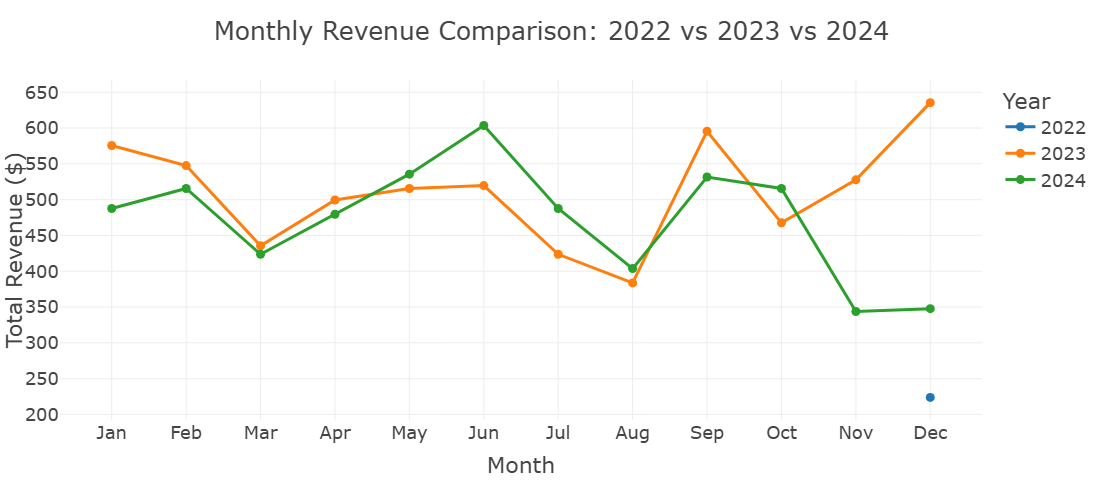

In [45]:
fig = px.line(
    monthly_revenue,
    x='Month',
    y='Total_Revenue',
    color='Year',
    markers=True,
    title='Monthly Revenue Comparison: 2022 vs 2023 vs 2024',
    category_orders={'Month': month_order},  
    template='presentation',
    line_shape='linear'
)

fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Total Revenue ($)',
    legend_title_text='Year',
    height=500,
    width=1000,
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    margin=dict(l=60, r=40, t=80, b=80)
)

fig.show()

fig.write_image(os.path.join(result_dir, 'Monthly_Revenue_Comparison_Line_Chart.jpg'))
fig.write_image(os.path.join(result_dir, 'Monthly_Revenue_Comparison_Line_Chart.png'))
fig.write_html(os.path.join(result_dir, 'Monthly_Revenue_Comparison_Line_Chart.html'))


## Watch Hours by Age Category

In [46]:
# Count and proportion of Age_Category
age_counts = stream_df['Age_Category'].value_counts().reset_index()
age_counts.columns = ['Age_Category', 'Count'] 
age_props = stream_df['Age_Category'].value_counts(normalize=True).reset_index()
print(age_counts)
print(age_props)

# Summary stats of Watch_Hours by Age_Category
watch_hours_summary = stream_df.groupby('Age_Category')['Watch_Hours'].describe()
print(watch_hours_summary)

# Count of Favorite_Genre by Age_Category
genre_counts = pd.crosstab(stream_df['Age_Category'], stream_df['Favorite_Genre'])
print(genre_counts)


       Age_Category  Count
0   Older Streamers    208
1  Mature Streamers    207
2  Senior Streamers    205
3   Adult Streamers    200
4   Young Streamers    180
       Age_Category  proportion
0   Older Streamers       0.208
1  Mature Streamers       0.207
2  Senior Streamers       0.205
3   Adult Streamers       0.200
4   Young Streamers       0.180
                  count        mean         std   min     25%    50%     75%  \
Age_Category                                                                   
Adult Streamers   200.0  268.520000  144.746459  11.0  135.75  278.0  406.50   
Mature Streamers  207.0  244.956522  139.489162  10.0  130.50  225.0  363.00   
Older Streamers   208.0  255.663462  135.851447  10.0  146.50  256.0  358.00   
Senior Streamers  205.0  264.668293  138.228453  11.0  158.00  280.0  376.00   
Young Streamers   180.0  237.061111  144.496860  11.0  111.25  239.5  354.25   

                    max  
Age_Category             
Adult Streamers   498.0  
Mature 

In [47]:
age_category_counts = stream_df["Age_Category"].value_counts().reset_index()
age_category_counts.columns = ["Age_Category", "User_Count"]

fig = px.pie(
    age_category_counts,
    names="Age_Category",
    values="User_Count",
    title="Viewer Age Category Distribution",
    hole=0.4,
    color_discrete_sequence=px.colors.sequential.Blues_r
)

fig.update_layout(
    template="presentation",
    height=500,
    width=700,
    legend_title=dict(text="Age Categories"),
    paper_bgcolor="rgba(0, 0, 0, 0)"
)

fig.show()
fig.write_image(os.path.join(result_dir, 'Age_Category_Distribution_Pie_Chart.jpg'))
fig.write_image(os.path.join(result_dir, 'Age_Category_Distribution_Pie_Chart.png'))
fig.write_html(os.path.join(result_dir, 'Age_Category_Distribution_Pie_Chart.html'))

The dataset categorizes users into five age groups with the following user counts:

- **Older Streamers:** 208 users  
- **Mature Streamers:** 207 users  
- **Senior Streamers:** 205 users  
- **Adult Streamers:** 200 users
- **Young Streamers:** 180 users  

A donut pie chart was created using Plotly Express to visualize this distribution, showing the proportion of users in each age category. We have to  saved as `.jpg`, `.png`, and `.html` files for reporting purposes in result folders.

### Favorite genre by Country

In [50]:
Favorite_genre_country = stream_df.groupby(['Country', 'Favorite_Genre']).size().reset_index(name='total').sort_values(by='total', ascending=False)
Favorite_genre_country.index=['']*len(Favorite_genre_country)
# Favorite_genre_country

In [51]:
fig = px.bar(
    Favorite_genre_country,
    x='Country',
    y='total',
    color='Favorite_Genre',
    barmode='group',
    title='Genre Preference by Country',
    text='total',
    color_discrete_sequence=px.colors.sequential.Blues_r,
    height=650,
    width=1250
)

fig.update_layout(
    xaxis_title='Country',
    yaxis_title='User Count',
    legend_title='Favorite Genre',
    template='presentation',
    margin=dict(l=100, r=50, t=100, b=180),
    paper_bgcolor="rgba(0,0,0,0)",
    plot_bgcolor="rgba(0,0,0,0)",
)

fig.update_traces(
    texttemplate='%{text:.0f}',
    textposition='outside'
)

fig.show()
fig.write_image(os.path.join(result_dir, 'Favorite_genre_by_country_Bar_chart.jpg'))
fig.write_image(os.path.join(result_dir, 'Favorite_genre_by_country_Bar_chart.png'))
fig.write_html(os.path.join(result_dir, 'Favorite_genre_by_country_Bar_chart.html'))


### Summary Description

The data represents the distribution of users' favorite genres across different countries. It reveals key viewing preferences such as Horror being most popular in France and Australia, Drama favored in the USA and Germany, and Comedy preferred in the UK and Canada. This summary highlights regional differences in content preferences, which can help in customizing content offerings and marketing strategies for each country.

- **France** has a strong preference for **Horror** (36 users) and **Romance** (26 users).
- **USA** users favor **Drama** (32 users), **Action** (26 users), and **Horror** (23 users).
- **UK** shows popularity for **Comedy** (30 users) and **Drama** (23 users).
- **Germany** users mostly enjoy **Action** (28 users) and **Drama** (23 users).
- **Australia**, **Canada**, and **India** have diverse preferences across genres like **Action**, **Romance**, **Comedy**, **Documentary**, and **Sci-Fi**.

## Payment method distribution

In [54]:
pay_trends = stream_df.groupby('Payment_Method')[['Monthly_Price', 'Loyalty_Points']].mean().round(2).reset_index()

pay_trends['Monthly_Price_percentage'] = (pay_trends['Monthly_Price'] / pay_trends['Monthly_Price'].sum() * 100).round(2)
pay_trends['Loyalty_Points_percentage'] = (pay_trends['Loyalty_Points'] / pay_trends['Loyalty_Points'].sum() * 100).round(2)
pay_trends.index=['']*len(pay_trends)
pay_trends


,Payment_Method,Monthly_Price,Loyalty_Points,Monthly_Price_percentage,Loyalty_Points_percentage
,Credit Card,11.95,2343.54,24.84,24.01
,Cryptocurrency,12.26,2469.45,25.49,25.30
,Debit Card,11.97,2425.82,24.89,24.85
,PayPal,11.92,2522.76,24.78,25.84


In [55]:
paypal = ['PayPal']
others = pay_trends[pay_trends['Payment_Method'] != 'PayPal'].sort_values(
    'Monthly_Price_percentage', ascending=False)['Payment_Method'].tolist()
custom_order = paypal + others

pay_trends['Payment_Method'] = pd.Categorical(
    pay_trends['Payment_Method'], categories=custom_order, ordered=True)

melted = pay_trends.melt(
    id_vars='Payment_Method',
    value_vars=['Monthly_Price_percentage', 'Loyalty_Points_percentage'],
    var_name='Metric',
    value_name='Percentage'
)

# Create the bar chart
fig = px.bar(
    melted,
    x='Payment_Method',
    y='Percentage',
    color='Metric',
    barmode='group',
    title="Payment Method Trends",
    text='Percentage',
    color_discrete_sequence=px.colors.sequential.Blues_r,
    height=600,
    width=1100
)

fig.update_traces(
    texttemplate='%{text:.1f}%',
    textposition='inside',
    marker_line_width=0
)

# Update layout
fig.update_layout(
    xaxis_title="Payment Method",
    yaxis_title="Percentage (%)",
    template="presentation",
    showlegend=True,
    legend_title_text="Metric",
    margin=dict(l=100, r=60, t=100, b=160),
    paper_bgcolor="rgba(0,0,0,0)",
    plot_bgcolor="rgba(0,0,0,0)",
    xaxis=dict(
        tickfont=dict(size=14),
        tickangle=0
    ),
    yaxis=dict(
        tickfont=dict(size=12)
    ),
    legend=dict(
        font=dict(size=12)
    )
)

fig.show()

fig.write_image(os.path.join(result_dir, 'Payment_Method_Trends_Bar_chart.jpg'))
fig.write_image(os.path.join(result_dir, 'Payment_Method_Trends_Bar_chart.png'))
fig.write_html(os.path.join(result_dir, 'Payment_Method_Trends_Bar_chart.html'))

### Payment Method Summary

This table provides an overview of user subscription and loyalty statistics by payment method:

- **Payment_Method:** Different modes of payment used by users, including Credit Card, Cryptocurrency, Debit Card, and PayPal.
- **Monthly_Price:** The average monthly subscription price paid by users for each payment method.
- **Loyalty_Points:** The average loyalty points accumulated by users in each payment group.
- **Monthly_Price_percentage:** The percentage share of each payment method in the overall monthly price distribution.
- **Loyalty_Points_percentage:** The percentage share of loyalty points earned by users of each payment method.

The data indicates that Cryptocurrency users pay slightly higher monthly prices and earn a comparable amount of loyalty points, while PayPal users have the highest average loyalty points despite a marginally lower subscription price.


### Device behavior analysis

In [58]:
device_watch = (
    stream_df.groupby('First_Device_Used')['Watch_Hours']
    .mean()
    .round(2)
    .reset_index(name='Average_Watch_Hours')
    .sort_values(by='Average_Watch_Hours', ascending=False)
)
device_watch.index=['']*len(device_watch)
device_watch


,First_Device_Used,Average_Watch_Hours
,Smartphone,271.84
,Desktop,261.76
,Smart TV,257.72
,Tablet,243.98
,Laptop,235.45


In [59]:
fig = px.bar(
    device_watch,
    x='First_Device_Used',
    y='Average_Watch_Hours',
    title='Device Watching Hours',
    text='Average_Watch_Hours',
    color_discrete_sequence=['#1f77b4'],
    height=600,
    width=1100
)

fig.update_layout(
    xaxis_title='Device Used',
    yaxis_title='Average Watch Hours',
    template='presentation',
    showlegend=False,
    margin=dict(l=60, r=40, t=80, b=80),
    paper_bgcolor="rgba(0, 0, 0, 0)",
    plot_bgcolor="rgba(0, 0, 0, 0)"
)

fig.update_traces(
    texttemplate='%{text:.2f}',
    textposition='inside',
    textfont_color='white',
    marker_opacity=0.7
)

fig.update_xaxes(tickangle=0, automargin=True)

fig.show()

fig.write_image(os.path.join(result_dir, 'Device_watching_Hours_Bar_chart.jpg'))
fig.write_image(os.path.join(result_dir, 'Device_watching_Hours_Bar_chart.png'))
fig.write_html(os.path.join(result_dir, 'Device_watching_Hours_Bar_chart.html'))




This table shows the average watch hours based on the first device used by viewers:

- **First_Device_Used:** The device users first accessed the streaming service on, including Smartphone, Desktop, Smart TV, Tablet, and Laptop.
- **Average_Watch_Hours:** The average number of hours watched by users who started on each device.

Key insights:
- Users who first accessed via **Smartphone** have the highest average watch hours (271.84 hours).
- Desktop and Smart TV users follow closely with averages of 261.76 and 257.72 hours, respectively.
- Tablet and Laptop users have comparatively lower average watch hours, at 243.98 and 235.45 hours.


## Device usage disribution

In [62]:
device_counts = stream_df["First_Device_Used"].value_counts().reset_index()
device_counts.columns = ["Device", "Count"]

fig = px.bar(
    device_counts,
    x="Device",
    y="Count",
    title="Device Usage Distribution",
    text="Count",
    color_discrete_sequence=['#1f77b4'],
    height=600,
    width=1100
)

fig.update_traces(texttemplate="%{text}", textposition="outside")

fig.update_layout(
    template="presentation",
    xaxis_title="Device Used",
    yaxis_title="User Count",
    xaxis_title_standoff=50,
    legend_title_text=None,
    showlegend=False,
    paper_bgcolor="rgba(0, 0, 0, 0)",
    plot_bgcolor="rgba(0, 0, 0, 0)"
)

fig.show()

fig.write_image(os.path.join(result_dir, 'Device_Usage_Distribution_Bar_chart.jpg'))
fig.write_image(os.path.join(result_dir, 'Device_Usage_Distribution_Bar_chart.png'))
fig.write_html(os.path.join(result_dir, 'Device_Usage_Distribution_Bar_chart.html'))


Most of the users or viewers like to use **Tablets** followed by **Smartphone**

### Watching hours per day

In [67]:
time_watch = (
    stream_df.groupby('Primary_Watch_Time')['Watch_Hours']
    .mean()
    .round(2)
    .reset_index(name='Average_Watch_Hours')
    .sort_values(by='Average_Watch_Hours', ascending=False)
)
time_watch.index=['']*len(time_watch)
time_watch

,Primary_Watch_Time,Average_Watch_Hours
,Morning,272.33
,Evening,255.39
,Afternoon,247.08
,Late Night,245.98


In [68]:
time_watch = (
    stream_df.groupby('Primary_Watch_Time')['Watch_Hours']
    .mean()
    .round(2)
    .reset_index(name='Average_Watch_Hours')
    .sort_values(by='Average_Watch_Hours', ascending=False)
)


fig = px.bar(
    time_watch,
    x='Primary_Watch_Time',
    y='Average_Watch_Hours',
    title='Watch Hours per Day',
    text='Average_Watch_Hours',
    color_discrete_sequence=['#1f77b4'],
    height=600,
    width=1100
)

fig.update_traces(
    texttemplate='%{text}',
    textposition='outside'
)

fig.update_layout(
    template="presentation",
    xaxis_title="Time of Day",
    yaxis_title="Average Watch Hours",
    xaxis_title_standoff=50,
    legend_title_text=None,
    showlegend=False,
    paper_bgcolor="rgba(0, 0, 0, 0)",
    plot_bgcolor="rgba(0, 0, 0, 0)"
)


fig.show()


fig.write_image(os.path.join(result_dir, 'Watch_Hours_per_Day_Bar_chart.jpg'))
fig.write_image(os.path.join(result_dir, 'Watch_Hours_per_Day_Bar_chart.png'))
fig.write_html(os.path.join(result_dir, 'Watch_Hours_per_Day_Bar_chart.html'))



This table presents the average watch hours based on the primary time of day users watch content:

- **Primary_Watch_Time:** The main time period when users watch content (Morning, Afternoon, Evening, Late Night).
- **Average_Watch_Hours:** The average number of hours watched by users during each time period.

Key insights:
- Users watching primarily in the **Morning** have the highest average watch hours (272.33 hours).
- Watching during the **Evening** follows with an average of 255.39 hours.
- The **Afternoon** and **Late Night** watch periods have slightly lower averages of 247.08 and 245.98 hours, respectively.


## Preffered watching time

In [71]:
watch_time = stream_df["Primary_Watch_Time"].value_counts().reset_index()
watch_time.columns = ["Primary_Watch_Time", "User_Count"]

fig = px.bar(
    watch_time,
    x="Primary_Watch_Time",
    y="User_Count",
    title="Preferred Watching Time",
    text="User_Count",
    color_discrete_sequence=['#1f77b4'], 
    height=600,
    width=1100
)

fig.update_traces(texttemplate="%{text}", textposition="outside")

fig.update_layout(
    template="presentation",
    xaxis_title="Watching Time",
    yaxis_title="Number of Users",
    xaxis_title_standoff=50,
    legend_title_text=None,
    showlegend=False,
    paper_bgcolor="rgba(0, 0, 0, 0)",
    plot_bgcolor="rgba(0, 0, 0, 0)"
)

fig.show()


fig.write_image(os.path.join(result_dir, 'Preferred_Watching_Time_Bar_chart.jpg'))
fig.write_image(os.path.join(result_dir, 'Preferred_Watching_Time_Bar_chart.png'))
fig.write_html(os.path.join(result_dir, 'Preferred_Watching_Time_Bar_chart.html'))


This table presents the data based on the primary time of day users watch content:

- **Primary_Watch_Time:** The main time period when users watch content (Morning, Afternoon, Evening, Late Night).
Key insights:
- Many Users watch primarily in the **late night** with 271 viewers
- Watching during the **Evening** follows with 256
- The **Afternoon** and **morning** watch periods have slightly low number of viewers respectively.

## Genre ratings

In [74]:
rating_counts = stream_df.groupby("Favorite_Genre")["Average_Rating_Given"].count().reset_index()
rating_counts.columns = ["Genre", "Rating_Count"]

avg_rating_genre = stream_df.groupby("Favorite_Genre")["Average_Rating_Given"].mean().reset_index()
avg_rating_genre.columns = ["Genre", "Average_Rating"]

combined = avg_rating_genre.merge(rating_counts, on="Genre")

fig = px.scatter(
    combined,
    x="Average_Rating",
    y="Genre",
    size="Rating_Count",
    color="Average_Rating",
    color_continuous_scale="Blues", 
    title="Average Rating by Genre with Rating Volume",
    height=600,
    width=1000,
    opacity=0.7  
)

fig.update_layout(
    xaxis_title="Average Rating",
    yaxis_title="Genre",
    template="presentation",
    margin=dict(l=150, r=50, t=100, b=50),  
    paper_bgcolor="rgba(0,0,0,0)",
    plot_bgcolor="rgba(0,0,0,0)"
)

fig.update_yaxes(tickangle=0, automargin=True)

fig.show()


fig.write_image(os.path.join(result_dir, 'Average_Rating_by_Genre_Bubble_Chart.jpg'))
fig.write_image(os.path.join(result_dir, 'Average_Rating_by_Genre_Bubble_Chart.png'))
fig.write_html(os.path.join(result_dir, 'Average_Rating_by_Genre_Bubble_Chart.html'))


**Summary:**  
- **Sci-Fi** leads with the highest rating of 4.03, indicating strong viewer engagement.  
- **Romance**, **Horror**, and **Drama** also have high ratings, showing their popularity.  
- **Documentary**, **Comedy**, and **Action** follow with relatively lower ratings.

## Favorite genres

In [81]:
fav_genre = stream_df["Favorite_Genre"].value_counts().reset_index()
fav_genre.columns = ["Genre", "Count"]
fav_genre = fav_genre.sort_values(by="Count", ascending=True)  

fig = px.bar(
    fav_genre,
    y="Genre",
    x="Count",
    orientation="h",
    title="Favorite Genre Distribution",
    text="Count",
    color_discrete_sequence=['#1f77b4'], 
    height=600,
    width=1100
)

fig.update_traces(texttemplate="%{text}", textposition="outside")

fig.update_layout(
    template="presentation",
    xaxis_title="Number of Users",
    yaxis_title="Genre",
    xaxis_title_standoff=50,
    legend_title_text=None,
    showlegend=False,
    margin=dict(l=200, r=50, t=100, b=50),
    yaxis=dict(tickmode='linear'),
    paper_bgcolor="rgba(0, 0, 0, 0)",
    plot_bgcolor="rgba(0, 0, 0, 0)"
)

fig.show()

fig.write_image(os.path.join(result_dir, 'Total_Rating_by_Favorite_Genre_Bar_chart_horizontal.jpg'))
fig.write_image(os.path.join(result_dir, 'Total_Rating_by_Favorite_Genre_Bar_chart_horizontal.png'))
fig.write_html(os.path.join(result_dir, 'Total_Rating_by_Favorite_Genre_Bar_chart_horizontal.html'))



**Summary:**  
- **Horror** leads with about 157 counts, indicating strong viewer engagement.  
- **Action**, **Comedy**, and **Romance** also have high number of viewers, showing their popularity.  
- **Drama**, **Documentary**, and **Sci-Fi** follow with relatively low number of viewers.


### Language preference by country

In [82]:
lang_country = stream_df.groupby(['Country', 'Language_Preference']).size().reset_index(name='Count')

lang_country


,Country,Language_Preference,Count
0,Australia,English,28
1,Australia,French,27
2,Australia,German,18
3,Australia,Hindi,15
4,Australia,Mandarin,30
5,Australia,Spanish,22
6,Canada,English,22
7,Canada,French,24
8,Canada,German,25
9,Canada,Hindi,26


In [83]:
lang_country.describe()

,Count
count,42.000000
mean,23.809524
std,4.266935
min,14.000000
25%,21.000000
50%,24.000000
75%,27.000000
max,30.000000


In [84]:
fig = px.treemap(
    lang_country,
    path=['Country', 'Language_Preference'],
    values='Count',
    title='Language Preference by Country',
    color='Count',
    color_continuous_scale='Viridis',
    height=700,
)


fig.update_layout(
    margin=dict(l=50, r=50, t=100, b=50),
    coloraxis_colorbar=dict(
        title='Count',
        thickness=15,
        len=0.5,
        yanchor='middle',
        y=0.5
    ),
    paper_bgcolor="rgba(0, 0, 0, 0)",
    plot_bgcolor="rgba(0, 0, 0, 0)"
)

fig.show()


fig.write_image(os.path.join(result_dir, 'Language_Preference_by_Country.jpg'))
fig.write_image(os.path.join(result_dir, 'Language_Preference_by_Country.png'))
fig.write_html(os.path.join(result_dir, 'Language_Preference_by_Country.html'))


- **English** and **Mandarin** are among the most popular language preferences across most countries.
- The **USA** and **Australia** have the highest counts for Mandarin speakers (30 users each).
- Language preference distributions are quite diverse within countries, with multiple languages represented.
- French, German, Hindi, and Spanish also show significant representation across all countries.

### Scatter Plot: Watch Hours vs. Loyalty Points

This plot shows the relationship between users' watch hours and loyalty points. A linear trendline is added to assess whether users who watch more content tend to earn more loyalty points. The data points are displayed with a clean and modern style.


In [89]:
fig = px.scatter(
    stream_df,
    x="Watch_Hours",
    y="Loyalty_Points",
    title="Relationship Between Watch Hours and Loyalty Points",
    labels={"Watch_Hours": "Watch Hours", "Loyalty_Points": "Loyalty Points"},
    trendline="ols",  # Adds regression line
    template="presentation",
    height=500,
    width=1000,
    color_discrete_sequence=['#3eb489']
)

fig.update_layout(
    paper_bgcolor="rgba(0,0,0,0)",
    plot_bgcolor="rgba(0,0,0,0)"
)

fig.show()

# Hypothesis Testing & Inference
In this section, we investigate deeper questions using statistical tests to move beyond patterns and assess whether differences or relationships are statistically significant.


####  Hypothesis Testing Strategy 

Before performing any hypothesis tests, we first checked for **normality** using the **Shapiro-Wilk test**. This helped us determine whether to use **parametric** or **non-parametric** methods.

####  Normality Check Summary
All key numerical variables involved in our analysis (e.g., `Watch_Hours`, `Loyalty_Points`, `Average_Rating_Given`) failed the normality test (p < 0.05), both overall and within groups.

#### Test Selection Based on Normality

| Research Question | Final Test Used |
|-------------------|------------------|
| Watch Hours vs Loyalty Points | Spearman Correlation |
| Watch Hours by Watch Time | Kruskal-Wallis Test |
| Rating by Favorite Genre | Kruskal-Wallis Test |
| Watch Hours by First Device | Kruskal-Wallis Test |
| Genre Preference by Country | Chi-Square Test (categorical) |

Using this approach ensured we selected the right tests based on the data distribution, making our results more valid and reliable.


In [92]:
from scipy.stats import shapiro

# Utility to check normality of a variable or variable by group
def check_normality(data, value_col, group_col=None):
    if group_col:
        print(f"\n Normality Check: {value_col} by {group_col}")
        for group_name, group_df in data.groupby(group_col):
            values = group_df[value_col].dropna()
            stat, p = shapiro(values)
            print(f"{group_col} = {group_name} --> W = {stat:.4f}, p = {p:.4f}")
    else:
        print(f"\n Normality Check: {value_col} (overall)")
        values = data[value_col].dropna()
        stat, p = shapiro(values)
        print(f"{value_col} --> W = {stat:.4f}, p = {p:.4f}")

# 1. Pearson correlation test assumptions
check_normality(stream_df, "Watch_Hours")
check_normality(stream_df, "Loyalty_Points")

# 2. ANOVA on Watch_Hours by Primary_Watch_Time
check_normality(stream_df, "Watch_Hours", "Primary_Watch_Time")

# 4. ANOVA on Watch_Hours by First_Device_Used
check_normality(stream_df, "Watch_Hours", "First_Device_Used")



 Normality Check: Watch_Hours (overall)
Watch_Hours --> W = 0.9574, p = 0.0000

 Normality Check: Loyalty_Points (overall)
Loyalty_Points --> W = 0.9553, p = 0.0000

 Normality Check: Watch_Hours by Primary_Watch_Time
Primary_Watch_Time = Afternoon --> W = 0.9536, p = 0.0000
Primary_Watch_Time = Evening --> W = 0.9651, p = 0.0000
Primary_Watch_Time = Late Night --> W = 0.9461, p = 0.0000
Primary_Watch_Time = Morning --> W = 0.9550, p = 0.0000

 Normality Check: Watch_Hours by First_Device_Used
First_Device_Used = Desktop --> W = 0.9491, p = 0.0000
First_Device_Used = Laptop --> W = 0.9625, p = 0.0001
First_Device_Used = Smart TV --> W = 0.9566, p = 0.0000
First_Device_Used = Smartphone --> W = 0.9610, p = 0.0000
First_Device_Used = Tablet --> W = 0.9462, p = 0.0000


###  1.Correlation Between Watch Hours and Loyalty Points (Non-Parametric)

#### Research Question
Do users who watch more hours tend to earn more loyalty points?
#### Hypotheses
- **H₀:** There is no monotonic relationship between watch hours and loyalty points.
- **H₁:** There is a significant monotonic relationship between watch hours and loyalty points.
#### Test Used
Spearman Rank Correlation (non-parametric alternative to Pearson)
#### Reason for Test
Normality tests on both `Watch_Hours` and `Loyalty_Points` returned p-values < 0.05. Therefore, a non-parametric test is appropriate.


In [94]:
from scipy.stats import spearmanr

# Spearman correlation
rho, p = spearmanr(stream_df["Watch_Hours"], stream_df["Loyalty_Points"])

print(f"Spearman correlation coefficient (rho): {rho:.4f}")
print(f"P-value: {p:.4f}")

if p < 0.05:
    print("There is a significant correlation between watch hours and loyalty points.")
else:
    print("There is no significant correlation between watch hours and loyalty points.")


Spearman correlation coefficient (rho): -0.0295
P-value: 0.3514
There is no significant correlation between watch hours and loyalty points.


#### Conclusion
There is **no significant monotonic relationship** between watch hours and loyalty points.  
- Spearman rho = -0.0295 
- P-value = 0.3514

####  Recommendation
- Consider refining the loyalty reward logic. Watching more doesn’t guarantee more points.
- Explore points based on content type or frequency instead of raw hours.


### 2.Watch Hours by Primary Watch Time (Non-Parametric)

#### Research Question
Do users who prefer different watching times (Morning, Afternoon, Evening, Late Night) have different average watch hours?

#### Hypotheses
- **H₀:** Watch hours are equal across all watch time groups.
- **H₁:** At least one group has different watch hour distribution.

#### Test Used
Kruskal-Wallis H-test (non-parametric ANOVA)

#### Reason for Test
All groups violated normality (p < 0.05), so Kruskal-Wallis is appropriate.


In [97]:
from scipy.stats import kruskal

# Kruskal-Wallis for Watch_Hours by Primary_Watch_Time
groups = [group["Watch_Hours"].dropna() for _, group in stream_df.groupby("Primary_Watch_Time")]
stat, p = kruskal(*groups)

print(f"Kruskal-Wallis statistic: {stat:.4f}")
print(f"P-value: {p:.4f}")

if p < 0.05:
    print("There is a significant difference in watch hours between watch time groups.")
else:
    print("There is no significant difference in watch hours between watch time groups.")


Kruskal-Wallis statistic: 5.1047
P-value: 0.1643
There is no significant difference in watch hours between watch time groups.


#### Conclusion
There is **no significant difference** in watch hours across different primary watch times.  
- Kruskal-Wallis statistic: 5.1047 
- P-value: 0.1643

#### Recommendation
- Viewing time preference doesn’t significantly impact how much users watch.
- Focus on content scheduling strategies rather than changing user habits.


### 3.Average Rating by Favorite Genre (Non-Parametric)

#### Research Question
Do average user ratings differ depending on their favorite genre?

#### Hypotheses
- **H₀:** There is no difference in average ratings across favorite genres.
- **H₁:** At least one genre has a different average rating.

#### Test Used
Kruskal-Wallis H-test (non-parametric alternative to One-Way ANOVA)

#### Reason for Using This Test
Shapiro-Wilk tests showed that `Average_Rating_Given` is not normally distributed in at least one genre group (e.g., Romance, p = 0.0131), violating the normality assumption required for ANOVA.


In [101]:
from scipy.stats import kruskal

# Prepare data
groups = [group["Average_Rating_Given"].dropna() for _, group in stream_df.groupby("Favorite_Genre")]

# Kruskal-Wallis test
stat, p = kruskal(*groups)

print(f"Kruskal-Wallis statistic: {stat:.4f}")
print(f"P-value: {p:.4f}")

if p < 0.05:
    print("There is a significant difference in ratings between genres.")
else:
    print("There is no significant difference in ratings between genres.")


Kruskal-Wallis statistic: 0.9745
P-value: 0.9866
There is no significant difference in ratings between genres.


#### Conclusion
There is **no significant difference** in average user ratings between genres.  
- Kruskal-Wallis statistic: 0.9745  
- P-value: 0.9866

#### Recommendation
- Since ratings are statistically similar across genres, prioritize content promotion based on user engagement, completion rates, or trending behavior.
- Continue to improve quality across all genres uniformly rather than focusing on one.


### 4.Watch Hours by First Device Used (Non-Parametric)

#### Research Question
Do users who started on different devices (Smartphone, Smart TV, Laptop, etc.) have different average watch hours?

#### Hypotheses
- **H₀:** Watch hours are similar across all device types.
- **H₁:** At least one device group differs in watch hours.

#### Test Used
Kruskal-Wallis H-test

#### Reason for Test
Normality tests failed for all device groups (p < 0.05), so non-parametric test is appropriate.


In [105]:
# Kruskal-Wallis for Watch_Hours by First_Device_Used
groups = [group["Watch_Hours"].dropna() for _, group in stream_df.groupby("First_Device_Used")]
stat, p = kruskal(*groups)

print(f"Kruskal-Wallis statistic: {stat:.4f}")
print(f"P-value: {p:.4f}")

if p < 0.05:
    print("There is a significant difference in watch hours across devices.")
else:
    print("There is no significant difference in watch hours across devices.")


Kruskal-Wallis statistic: 8.3368
P-value: 0.0800
There is no significant difference in watch hours across devices.


#### Conclusion
There is **no significant difference** in watch hours based on the device used to start the membership.  
- Kruskal-Wallis statistic: 8.3368  
- P-value: 0.0800

#### Recommendation
- Device type doesn’t impact engagement significantly.
- Optimize experience consistently across all device types rather than tailoring for specific ones.


###  5.Genre Preference by Country

#### Research Question
Does genre preference vary based on users' country?

#### Hypotheses
- **H₀:** Genre preference is independent of country.
- **H₁:** Genre preference depends on country.

#### Test Used
Chi-Square Test of Independence


In [108]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create contingency table
contingency_table = pd.crosstab(stream_df["Favorite_Genre"], stream_df["Country"])

chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("There is a significant relationship between country and genre preference.")
else:
    print("There is no significant relationship between country and genre preference.")


Chi-square statistic: 45.0005
P-value: 0.1445
There is no significant relationship between country and genre preference.


####  Conclusion
There is **no significant relationship** between country and genre preference.  
- Chi-square statistic: 45.0005  
- P-value: 0.1445 (> 0.05)

####  Recommendation
- Since genre preference does not significantly vary by country, a **uniform content strategy** can be applied across regions.
- Focus on overall popular genres rather than country-specific tailoring.

## Overall Conclusion & Recommendations

###  Final Recommendations

- **Loyalty System:** Since people who watch more don’t always get more loyalty points, consider giving rewards based on how often they watch or the variety of content they explore, not just how long they watch.
- **Device Use:** Because watch time is similar across all devices, just make sure the platform works well on phones, TVs, laptops, and tablets equally.
- **Watching Time:** The time of day people prefer to watch doesn’t affect how much they watch. Instead of changing user habits, help them find good content at any time.
- **Genres & Ratings:** Since ratings are similar across genres, focus on promoting content that keeps users engaged, not just what gets the highest ratings.

---

###  Conclusion

The data shows that users behave similarly across different groups — by time, device, or genre. So, future improvements should focus on **making the experience more personalized and engaging**, instead of changing when or how users watch.

This project shows how using **exploratory analysis, visuals, and the right statistical tests** can help make better, data-based decisions.
